<a href="https://colab.research.google.com/github/varnit836/NETFLIX-MOVIES-AND-TV-SHOWS-CLUSTERING/blob/main/NETFLIX_MOVIES_AND_TV_SHOWS_CLUSTERING.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Problem Statement**

This dataset consists of tv shows and movies available on Netflix as of 2019. The dataset is collected from Flixable which is a third-party Netflix search engine.

In 2018, they released an interesting report which shows that the number of TV shows on Netflix has nearly tripled since 2010. The streaming service’s number of movies has decreased by more than 2,000 titles since 2010, while its number of TV shows has nearly tripled. It will be interesting to explore what all other insights can be obtained from the same dataset.

Integrating this dataset with other external datasets such as IMDB ratings, rotten tomatoes can also provide many interesting findings.

## <b>In this  project, you are required to do </b>
1. Exploratory Data Analysis 

2. Understanding what type content is available in different countries

3. Is Netflix has increasingly focusing on TV rather than movies in recent years.
4. Clustering similar content by matching text-based features



# **Attribute Information**

1. show_id : Unique ID for every Movie / Tv Show

2. type : Identifier - A Movie or TV Show

3. title : Title of the Movie / Tv Show

4. director : Director of the Movie

5. cast : Actors involved in the movie / show

6. country : Country where the movie / show was produced

7. date_added : Date it was added on Netflix

8. release_year : Actual Releaseyear of the movie / show

9. rating : TV Rating of the movie / show

10. duration : Total Duration - in minutes or number of seasons

11. listed_in : Genere

12. description: The Summary description

In [1]:
# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
netflix=pd.read_csv('/content/drive/MyDrive/AlmaBetter/Capstone project/NETFLIX MOVIES AND TV SHOWS CLUSTERING/NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv')

In [4]:
netflix.head(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


##Data Cleaning

In [5]:
# creating copy of data
df = netflix.copy()

In [6]:
# shape of data
print('No. of rows :',df.shape[0])
print('No. of Columns :',df.shape[1])

No. of rows : 7787
No. of Columns : 12


In [7]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [8]:
#checking duplicate values
df.duplicated().sum()

0

In [9]:
# checking null values
df.isnull().sum()

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

In [10]:
# Dealing with null values
df['director'].fillna('Unknown', inplace=True)
df['cast'].fillna('Unknown', inplace=True)
df['country'].fillna('Unknown', inplace=True)

# Droping some columns too
df.dropna(subset=['date_added','rating'],inplace=True)

Since director have many null values if we drop them, we loss a lot data so, we replacing them with unknown.

In [11]:
# checking null value again
df.isnull().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

In [12]:
# checking info 
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7770 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7770 non-null   object
 1   type          7770 non-null   object
 2   title         7770 non-null   object
 3   director      7770 non-null   object
 4   cast          7770 non-null   object
 5   country       7770 non-null   object
 6   date_added    7770 non-null   object
 7   release_year  7770 non-null   int64 
 8   rating        7770 non-null   object
 9   duration      7770 non-null   object
 10  listed_in     7770 non-null   object
 11  description   7770 non-null   object
dtypes: int64(1), object(11)
memory usage: 789.1+ KB


#Exploratory Data Analysis

##TV shows and Movies

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


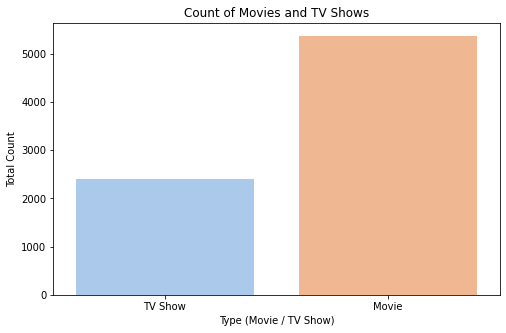

In [13]:
# count plot for TV shows and Movies
plt.figure(figsize=(8,5))
g = sns.countplot(df.type, palette="pastel");
plt.title("Count of Movies and TV Shows")
plt.xlabel("Type (Movie / TV Show)")
plt.ylabel("Total Count")
plt.show()

In [14]:
df['type'].value_counts()

Movie      5372
TV Show    2398
Name: type, dtype: int64

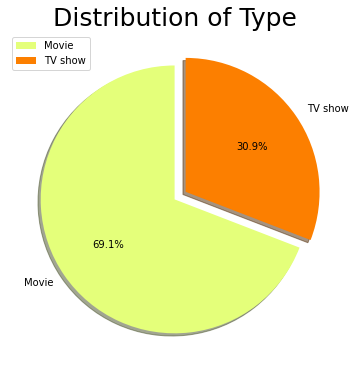

In [15]:
# pie chart for movie and tv show
labels = ['Movie', 'TV show']
size = df['type'].value_counts()
colors = plt.cm.Wistia(np.linspace(0, 1, 2))
explode = [0, 0.1]
plt.rcParams['figure.figsize'] = (6, 7)
plt.pie(size,labels=labels, colors = colors,autopct='%1.1f%%', explode = explode, shadow = True, startangle = 90)
plt.title('Distribution of Type', fontsize = 25)
plt.legend()
plt.show()

**It seems like Netflix has more movies than TV shows in a percentage of 69% against 31% approximately.**

##Rating of shows and movies

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Rating')

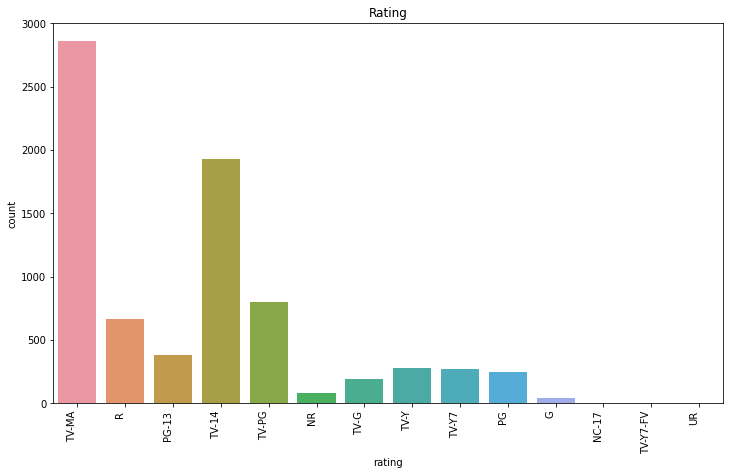

In [16]:
# count plot for ratings
sns.countplot(df['rating'])
sns.countplot(df['rating']).set_xticklabels(sns.countplot(df['rating']).get_xticklabels(), rotation=90, ha="right")
fig = plt.gcf()
fig.set_size_inches(12,7)
plt.title('Rating')

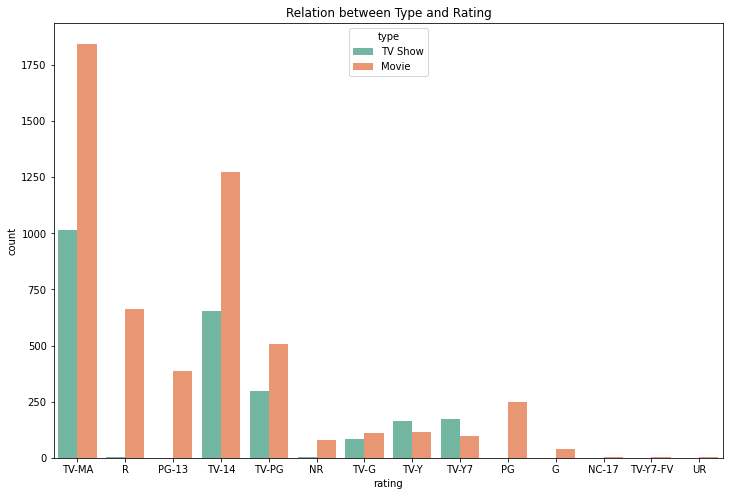

In [17]:
# graph for different rating on movies and tv shows
plt.figure(figsize=(12,8))
sns.countplot(x='rating',hue='type',data=df,palette="Set2")
plt.title('Relation between Type and Rating')
plt.show()

**Most of the Movies and tv shows have rating of TV-MA (Mature Audience), However, for the younger audience (under the age of 17), it is the opposite, there are slightly more TV shows than there are movies.**

##Content added each year

In [18]:
# Extracting month and year
df['year_added'] = pd.DatetimeIndex(df['date_added']).year
df['month_added'] = pd.DatetimeIndex(df['date_added']).month

In [19]:
df_year = df['year_added'].value_counts().to_frame().reset_index().rename(columns={'index': 'year','year_added':'count'})
df_year

,year,count
0,2019,2153
1,2020,2009
2,2018,1684
3,2017,1222
4,2016,440
5,2021,117
6,2015,88
7,2014,25
8,2011,13
9,2013,11


In [20]:
df_year2 = df[['type','year_added']]
movie_year = df_year2[df_year2['type']=='Movie'].year_added.value_counts().to_frame().reset_index().rename(columns={'index': 'year','year_added':'count'})

show_year = df_year2[df_year2['type']=='TV Show'].year_added.value_counts().to_frame().reset_index().rename(columns={'index': 'year','year_added':'count'})

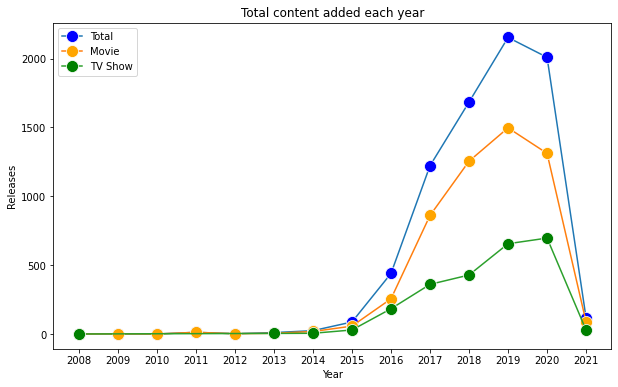

In [21]:
# line chart to see content add each year
fig, ax = plt.subplots(figsize=(10, 6))
sns.lineplot(data=df_year, x='year', y='count',marker = 'o',
         markerfacecolor = 'blue', markersize = 12)
sns.lineplot(data=movie_year, x='year', y='count',marker = 'o',
         markerfacecolor = 'orange', markersize = 12)
sns.lineplot(data=show_year, x='year', y='count',marker = 'o',
         markerfacecolor = 'green', markersize = 12)
ax.set_xticks(np.arange(2008, 2022, 1))
plt.title("Total content added each year")
plt.legend(['Total','Movie','TV Show'])
plt.ylabel("Releases")
plt.xlabel("Year")
plt.show()

**Based on this graph, we can see that the popular streaming platform started gaining traction after 2014. Since then, the amount of content added has been tremendous.

But after 2019, streaming platform going down. May be this due the world pandamic (covid_19).**

##Film Duration

In [22]:
# splitting movie and tv shows
df_movies = df[df['type']=='Movie'].copy()
df_show = df[df['type']=='Tv show'].copy()

In [23]:
# seprating values
df_movies.duration = df_movies.duration.str.replace(' min','').astype(int)
df_show.rename(columns={'duration':'seasons'}, inplace=True)
df_show.replace({'seasons':{'1 Season':'1 Seasons'}}, inplace=True)
df_show.seasons = df_show.seasons.str.replace(' Seasons','').astype(int)

In [24]:
df_movies['year_added'] = pd.DatetimeIndex(df_movies['date_added']).year
df_show['year_added'] = pd.DatetimeIndex(df_show['date_added']).year

df_movies['month_added'] = pd.DatetimeIndex(df_movies['date_added']).month
df_show['month_added'] = pd.DatetimeIndex(df_show['date_added']).month

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'Duration (minutes)')

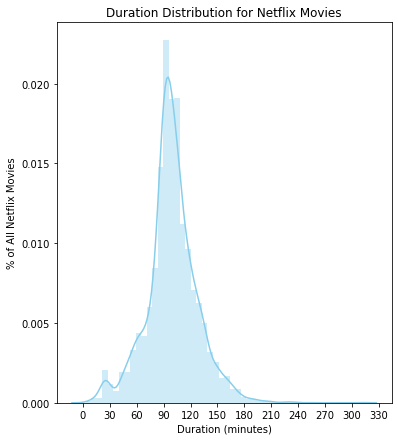

In [25]:
# ploting distplot for movies
g1 = sns.distplot(df_movies.duration, color='skyblue');
g1.set_xticks(np.arange(0,360,30))
g1.set_title("Duration Distribution for Netflix Movies")
g1.set_ylabel("% of All Netflix Movies")
g1.set_xlabel("Duration (minutes)")

##Countries with the most content available

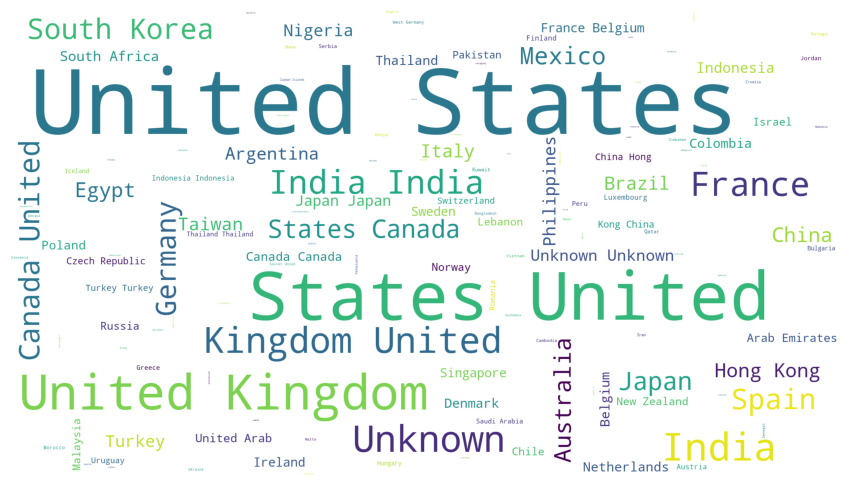

In [26]:
# importing word cloud
from wordcloud import WordCloud

# ploting cloud for country
plt.subplots(figsize=(15,15))
wordcloud = WordCloud(
                          background_color='white',
                          width=1920,
                          height=1080
                         ).generate(" ".join(df.country))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

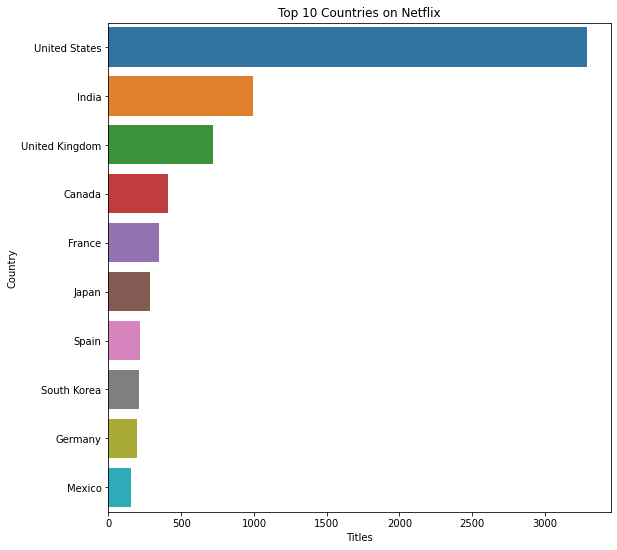

In [27]:
#seperating all countries and also not taking Unknown countries
ct = df.set_index('title').country.str.split(', ', expand=True).stack().reset_index(level=1, drop=True);
ct = ct[ct != 'Unknown']

# ploting countplot on top 10 countries on netflix
plt.figure(figsize=(9,9))
g = sns.countplot(y = ct, order=ct.value_counts().index[:10])
plt.title('Top 10 Countries on Netflix')
plt.xlabel('Titles')
plt.ylabel('Country')
plt.show()

**So, As you can see that

The United States stands out on top since Netflix is an American company.

India comes in second followed by the UK and Canada.**

##Genres

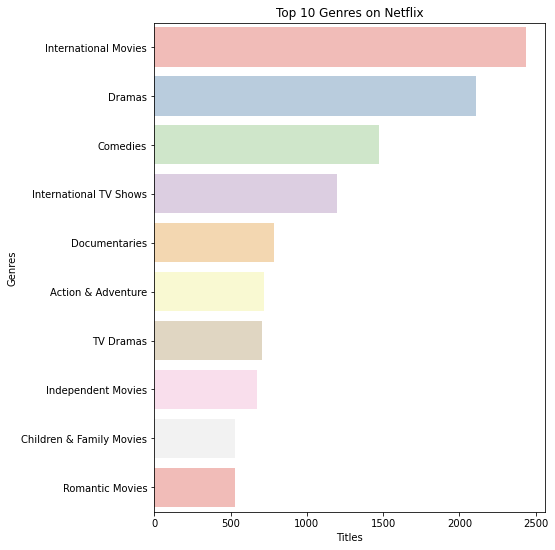

In [28]:
# Seprating Genres
genres = df.set_index('title').listed_in.str.split(', ', expand=True).stack().reset_index(level=1, drop=True);

# ploting graph for top 10 genres
plt.figure(figsize=(7,9))
g = sns.countplot(y = genres, order=genres.value_counts().index[:10],palette = "Pastel1")
plt.title('Top 10 Genres on Netflix')
plt.xlabel('Titles')
plt.ylabel('Genres')
plt.show()

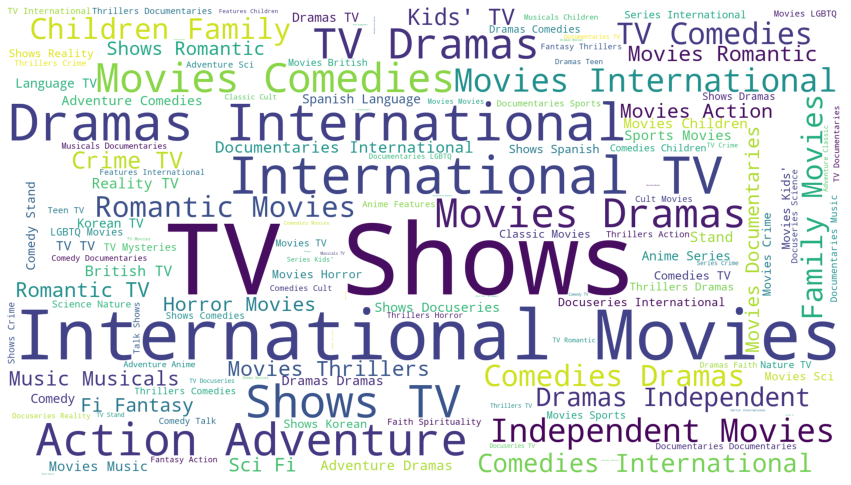

In [29]:
# genres cloud
plt.subplots(figsize=(15,15))
wordcloud = WordCloud(
                          background_color='white',
                          width=1920,
                          height=1080
                         ).generate(" ".join(genres))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()


**In terms of genres, international movies takes the cake surprisingly followed by dramas and comedies. Even though the United States has the most content available, it looks like Netflix has decided to release a ton of international movies.**

##Top 10 directors on Netflix

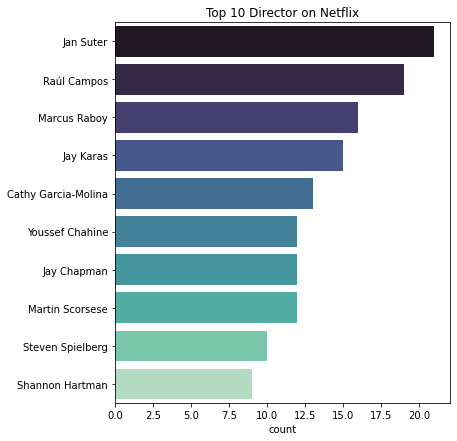

In [30]:
# Graph for top 10 directors
directors = df[df.director != 'Unknown'].set_index('title').director.str.split(', ', expand=True).stack().reset_index(level=1, drop=True)
sns.countplot(y = directors, order=directors.value_counts().index[:10], palette='mako')
plt.title('Top 10 Director on Netflix')
plt.show()

**As stated previously regarding the top genres, it's no surprise that the most popular directors on Netflix with the most titles are mainly international as well.**

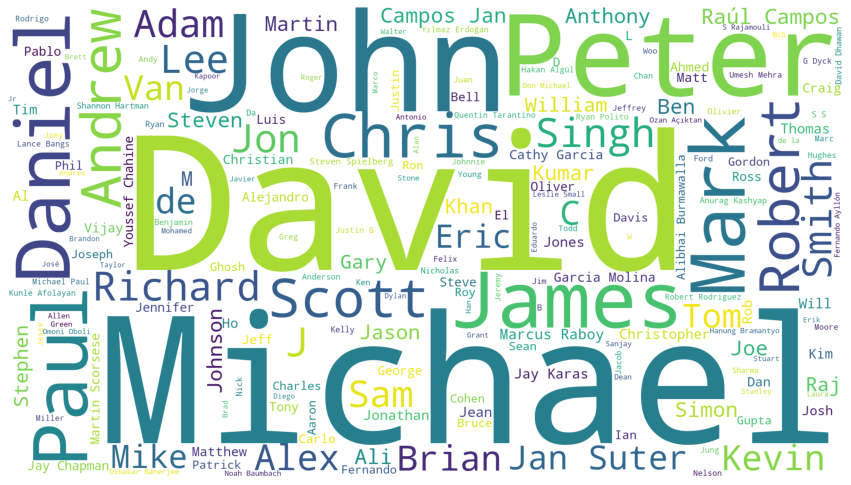

In [31]:
# Director cloud
plt.subplots(figsize=(15,15))
wordcloud = WordCloud(
                          background_color='white',
                          width=1920,
                          height=1080
                         ).generate(" ".join(directors))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

##Top 10 actors on Netflix

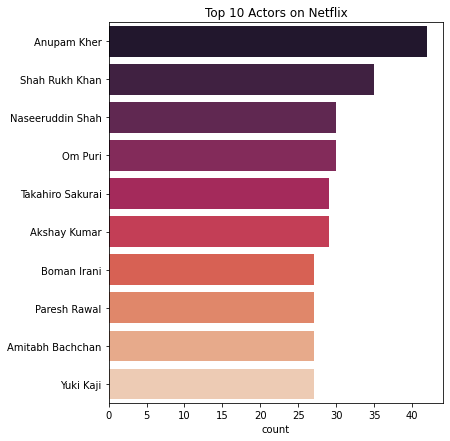

In [32]:
# Graph for top 10 actors
actor = df[df.cast != 'Unknown'].set_index('title').cast.str.split(', ', expand=True).stack().reset_index(level=1, drop=True)
sns.countplot(y = actor, order=actor.value_counts().index[:10], palette='rocket')
plt.title('Top 10 Actors on Netflix')
plt.show()

**Prep: Transforming the Data for a More Insights**

##New Features From "type" Column

In [33]:
# Applying encoding on raw data
type_encoding = pd.get_dummies(df['type'])
df_type = df.merge(type_encoding, left_index=True, right_index=True)

# Dropping old column
df_type.drop('type', axis=1, inplace=True)
df_type.loc[:, ['title', 'Movie', 'TV Show']].head()

,title,Movie,TV Show
0,3%,0,1
1,7:19,1,0
2,23:59,1,0
3,9,1,0
4,21,1,0


##New Features From "director" Column

In [34]:
# Droping rows where director is unknown
i = df_type[((df_type.director == 'Unknown'))].index
df_type= df_type.drop(i)

In [35]:
# Defining a function for extracting top N from a column

top10_dir = list(df_type['director'].value_counts()[:10].index)
top50_dir = list(df_type['director'].value_counts()[:50].index)
top100_dir = list(df_type['director'].value_counts()[:100].index)

# Creating a copy of previous DataFrame for keeping log of transformations
df_dir = df_type.copy()

# Creating flags for top directors
df_dir['is_top10_director'] = df_dir['director'].apply(lambda x: 1 if x in top10_dir else 0)
df_dir['is_top50_director'] = df_dir['director'].apply(lambda x: 1 if x in top50_dir else 0)
df_dir['is_top100_director'] = df_dir['director'].apply(lambda x: 1 if x in top100_dir else 0)
df_dir['top_director_sum'] = df_dir['is_top10_director'] + df_dir['is_top50_director'] + df_dir['is_top100_director']
df_dir['is_top_director'] = df_dir['top_director_sum'].apply(lambda x: 1 if x > 0 else x)

# Results
df_dir.loc[10:20, ['title', 'director', 'is_top_director', 'is_top10_director', 'is_top50_director', 
                   'is_top100_director']]

,title,director,is_top_director,is_top10_director,is_top50_director,is_top100_director
10,1922,Zak Hilditch,0,0,0,0
12,1994,Diego Enrique Osorno,0,0,0,0
13,"2,215",Nottapon Boonprakob,0,0,0,0
14,3022,John Suits,0,0,0,0
15,Oct-01,Kunle Afolayan,1,0,1,1
17,22-Jul,Paul Greengrass,0,0,0,0
18,15-Aug,Swapnaneel Jayakar,0,0,0,0
20,​​Kuch Bheege Alfaaz,Onir,0,0,0,0


##New Features From "cast" Column

In [36]:
# Creating a copy of previous DataFrame for keeping log of transformations
df_cast = df_dir.copy()

# Extracting how many people are part of the show
df_cast['cast_list'] = df_cast['cast'].fillna('').apply(lambda x: x.split(','))
df_cast['people_on_cast'] = df_cast['cast_list'].apply(lambda x: len(x))

# Deleting auxiliar cast list column
df_cast.drop('cast_list', axis=1, inplace=True)

# Results
df_cast.loc[:5, ['title', 'cast', 'people_on_cast']]

,title,cast,people_on_cast
1,7:19,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",6
2,23:59,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",9
3,9,"Elijah Wood, John C. Reilly, Jennifer Connelly...",9
4,21,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",12
5,46,"Erdal Beşikçioğlu, Yasemin Allen, Melis Birkan...",10


In [37]:
# Defining function for extracting individual names from cast list
def extract_list_from_string(cast_str, splitter=','):
    try:
        return [c.strip() for c in cast_str.split(splitter)]
    except AttributeError as ae:
        return np.nan

# Extracting a list from cast column
cast_list = extract_list_from_string(''.join(list(df['cast'].fillna(' ').values)))

# Extracting top 10, 30 and 50 actors from cast list
top_actors = pd.DataFrame(cast_list, columns=['actor'])
top10_actors = top_actors.head(10)['actor'].values
top30_actors = top_actors.head(30)['actor'].values
top50_actors = top_actors.head(50)['actor'].values

# Defining a function for counting how many actors are on top list
def count_actors_on_top_list(cast_list, top_actors_list):
    try:
        return len([act for act in cast_list if act in top_actors_list])
    except TypeError as te:
        return 0

# Returning the new features
df_cast['actors_on_top10_cast'] = df_cast['cast'].apply(lambda x: count_actors_on_top_list(extract_list_from_string(x), top10_actors))
df_cast['actors_on_top30_cast'] = df_cast['cast'].apply(lambda x: count_actors_on_top_list(extract_list_from_string(x), top30_actors))
df_cast['actors_on_top50_cast'] = df_cast['cast'].apply(lambda x: count_actors_on_top_list(extract_list_from_string(x), top50_actors))

# Results
df_cast.sort_values(by='actors_on_top50_cast', ascending=False).head().loc[:, ['title', 'cast', 
                                                                               'people_on_cast', 
                                                                               'actors_on_top10_cast', 
                                                                               'actors_on_top30_cast',
                                                                               'actors_on_top50_cast']]

,title,cast,people_on_cast,actors_on_top10_cast,actors_on_top30_cast,actors_on_top50_cast
4,21,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",12,0,0,10
3,9,"Elijah Wood, John C. Reilly, Jennifer Connelly...",9,0,6,7
5,46,"Erdal Beşikçioğlu, Yasemin Allen, Melis Birkan...",10,0,0,7
2,23:59,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",9,0,7,7
1,7:19,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",6,0,4,4


##New Features From "date_added" Column

In [38]:
# Making a copy of the last changed dataset
df_date = df.copy()

# Result cols
date_cols = ['title', 'date_added', 'day_added', 'month_added', 'year_added', 'quarter_added', 
             'semester_added', 'days_on_catalog', 'months_on_catalog', 'years_on_catalog', 'release_year', 
             'title_age_years']

# Transforming the date add column into a datetime format
df_date['dt_added'] = pd.to_datetime(df_date['date_added'])
df_date['day_added'] = df_date['dt_added'].apply(lambda x: x.day)
df_date['month_added'] = df_date['dt_added'].apply(lambda x: x.month)
df_date['year_added'] = df_date['dt_added'].apply(lambda x: x.year)
df_date['quarter_added'] = df_date['month_added'].apply(lambda x: np.ceil(x / 4))
df_date['semester_added'] = df_date['month_added'].apply(lambda x: 1 if x <= 6 else 2)

# Setting snapshot date
df_date['catalog_date'] = df_date['dt_added'].max()

# Computing relative deltas between date added and actual date
df_date['days_on_catalog'] = (df_date['catalog_date'] - df_date['dt_added']).dt.days
df_date['months_on_catalog'] = df_date['days_on_catalog'].apply(lambda x: round(x / 30, 0))
df_date['years_on_catalog'] = df_date['months_on_catalog'].apply(lambda x: np.floor(x / 12))
df_date['title_age_years'] = df_date['catalog_date'].dt.year - df_date['release_year']

# Results
df_date.head(10).loc[:, date_cols]


,title,date_added,day_added,month_added,year_added,quarter_added,semester_added,days_on_catalog,months_on_catalog,years_on_catalog,release_year,title_age_years
0,3%,"August 14, 2020",14,8,2020,2.0,2,155,5.0,0.0,2020,1
1,7:19,"December 23, 2016",23,12,2016,3.0,2,1485,50.0,4.0,2016,5
2,23:59,"December 20, 2018",20,12,2018,3.0,2,758,25.0,2.0,2011,10
3,9,"November 16, 2017",16,11,2017,3.0,2,1157,39.0,3.0,2009,12
4,21,"January 1, 2020",1,1,2020,1.0,1,381,13.0,1.0,2008,13
5,46,"July 1, 2017",1,7,2017,2.0,2,1295,43.0,3.0,2016,5
6,122,"June 1, 2020",1,6,2020,2.0,1,229,8.0,0.0,2019,2
7,187,"November 1, 2019",1,11,2019,3.0,2,442,15.0,1.0,1997,24
8,706,"April 1, 2019",1,4,2019,1.0,1,656,22.0,1.0,2019,2
9,1920,"December 15, 2017",15,12,2017,3.0,2,1128,38.0,3.0,2008,13


In [39]:
# Results cols
cat_date_cols = ['title', 'catalog_year', 'release_year', 'years_to_add_on_cat',
                 'added_on_release_year']

# New features
df_date['catalog_year'] = df_date['catalog_date'].apply(lambda x: x.year)
df_date['years_to_add_on_cat'] = df_date['catalog_year'] - df_date['release_year']
df_date['added_on_release_year'] = df_date['years_to_add_on_cat'].apply(lambda x: 1 if x == 0 else 0)

# Results
df_date.head().loc[:, cat_date_cols]

,title,catalog_year,release_year,years_to_add_on_cat,added_on_release_year
0,3%,2021,2020,1,0
1,7:19,2021,2016,5,0
2,23:59,2021,2011,10,0
3,9,2021,2009,12,0
4,21,2021,2008,13,0


In [40]:
# Catalog addition on same year of release
df_date.sort_values(by='added_on_release_year', ascending=False).head().loc[:, cat_date_cols]

,title,catalog_year,release_year,years_to_add_on_cat,added_on_release_year
980,Bling Empire,2021,2021,0,1
1780,Disenchantment,2021,2021,0,1
1440,Cobra Kai,2021,2021,0,1
6701,The Netflix Afterparty,2021,2021,0,1
6477,The Idhun Chronicles,2021,2021,0,1


##New Features From "listed_in" Column

In [41]:
# Making another copy of the original dataframe
df_listed = df_date.copy()

# Results cols
listed_cols = ['title', 'listed_in', 'num_diff_types', 'top_listed_in',
               'listed_in_Dramas', 'listed_in_Independent Movies', 'listed_in_International Movies',
               'listed_in_Other']

# Extracting a list of different titles type
listed_in_list = extract_list_from_string(' '.join(list(df_listed['listed_in'].fillna('').values)))
df_listed['listed_in_list'] = df_listed['listed_in'].fillna('').apply(lambda x: x.split(','))
df_listed['num_diff_types'] = df_listed['listed_in_list'].apply(lambda x: len(x))

# Extracting the top listed in types
top_n = 5
top_listed_in = list(pd.DataFrame(listed_in_list, columns=['type']).value_counts().index[:top_n])
top_listed_in = [t[0] for t in top_listed_in]
df_listed['top_listed_in'] = df_listed['listed_in'].apply(lambda x: x if x in top_listed_in else 'Other')

# Applying encoding on top listed in elements
df_listed = df_listed.merge(pd.get_dummies(df_listed['top_listed_in'], prefix='listed_in'),
                            how='left', left_index=True, right_index=True)

# Results
df_listed.head().loc[:, listed_cols]

,title,listed_in,num_diff_types,top_listed_in,listed_in_Dramas,listed_in_Independent Movies,listed_in_International Movies,listed_in_Other
0,3%,"International TV Shows, TV Dramas, TV Sci-Fi &...",3,Other,0,0,0,1
1,7:19,"Dramas, International Movies",2,Other,0,0,0,1
2,23:59,"Horror Movies, International Movies",2,Other,0,0,0,1
3,9,"Action & Adventure, Independent Movies, Sci-Fi...",3,Other,0,0,0,1
4,21,Dramas,1,Dramas,1,0,0,0


##New Features From "duration" Column

In [42]:
# Making a copy of the dataframe
df_duration = df_listed.copy()

# Result cols
dur_cols = ['title', 'duration', 'duration_num']

# Extracting numerical info for title duration
df_duration['duration_num'] = df_duration['duration'].apply(lambda x: int(x.split(' ')[0]))

# Results
df_duration.head().loc[:, dur_cols]

,title,duration,duration_num
0,3%,4 Seasons,4
1,7:19,93 min,93
2,23:59,78 min,78
3,9,80 min,80
4,21,123 min,123


##Final Preparation

In [43]:
# Splitting data by its type
movies = df_duration[df_duration['type'] == 'Movie']
tvshows = df_duration[df_duration['type'] == 'TV Show']

# Columns to be dropped
to_drop = ['title', 'show_id', 'director', 'cast', 'country', 'date_added', 'rating', 'duration', 
           'dt_added', 'catalog_date', 'catalog_year', 'listed_in', 'description', 'listed_in_list', 
           'top_listed_in', 'year_added', 'release_year','type']

# Dropping columns
X_movies = movies.drop(to_drop, axis=1)
X_tvshows = tvshows.drop(to_drop, axis=1).dropna()

# Preview of dataframes
print(f'Shape of movies data: {X_movies.shape}')
print(f'Shape of tv shows data: {X_tvshows.shape}')

X_movies.head()

Shape of movies data: (5372, 17)
Shape of tv shows data: (2398, 17)


,month_added,day_added,quarter_added,semester_added,days_on_catalog,months_on_catalog,years_on_catalog,title_age_years,years_to_add_on_cat,added_on_release_year,num_diff_types,listed_in_Dramas,listed_in_Independent Movies,listed_in_International Movies,listed_in_International TV Shows,listed_in_Other,duration_num
1,12,23,3.0,2,1485,50.0,4.0,5,5,0,2,0,0,0,0,1,93
2,12,20,3.0,2,758,25.0,2.0,10,10,0,2,0,0,0,0,1,78
3,11,16,3.0,2,1157,39.0,3.0,12,12,0,3,0,0,0,0,1,80
4,1,1,1.0,1,381,13.0,1.0,13,13,0,1,1,0,0,0,0,123
6,6,1,2.0,1,229,8.0,0.0,2,2,0,2,0,0,0,0,1,95


##PCA

In [44]:
# XPlotter is easy to use desktop plotter, Laser cutter and engraver.
!pip install xplotter

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


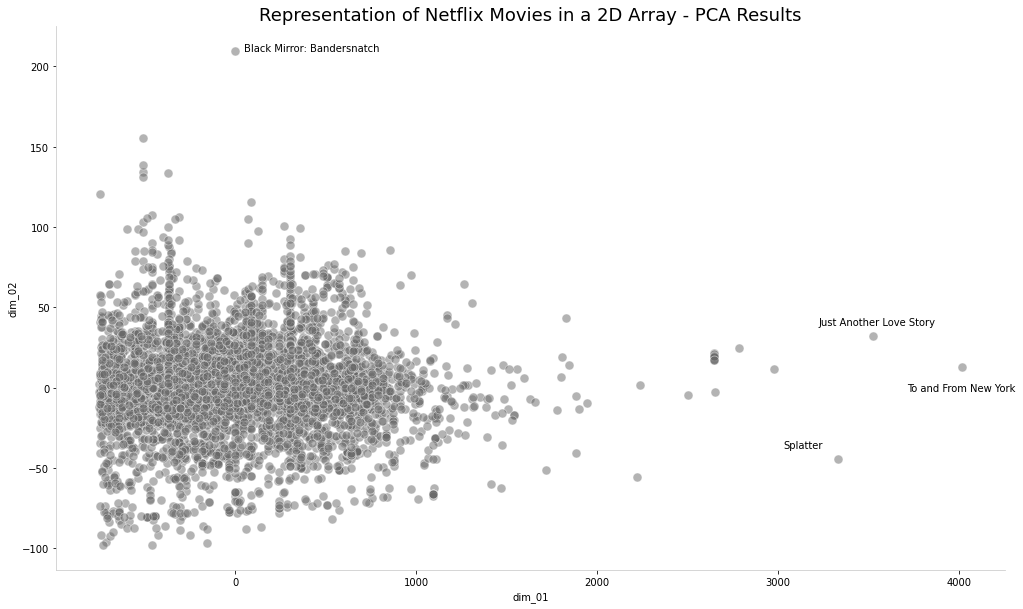

In [45]:
# Importing libraries
from sklearn.decomposition import PCA
from xplotter.formatter import format_spines

# Creating a PCA with 2 components
pca = PCA(n_components=2)
X_movies_2d = pca.fit_transform(X_movies)
X_movies_2d = pd.DataFrame(X_movies_2d, columns=['dim_01', 'dim_02'])

# Plotting the new 2D data
fig, ax = plt.subplots(figsize=(17, 10))
sns.scatterplot(x='dim_01', y='dim_02', data=X_movies_2d, alpha=.5, color='dimgrey', s=80)

# Customizing chart
format_spines(ax)
ax.set_title('Representation of Netflix Movies in a 2D Array - PCA Results', size=18)

# Sorting movies by dim 01
sorted_movies_dim01 = X_movies_2d.sort_values(by='dim_01', ascending=False)
sorted_movies_dim02 = X_movies_2d.sort_values(by='dim_02', ascending=False)

# Retrieving top 3 movies by dim 01
top01_dim01_movie = movies.iloc[sorted_movies_dim01.index[0], :].title
top02_dim01_movie = movies.iloc[sorted_movies_dim01.index[1], :].title
top03_dim01_movie = movies.iloc[sorted_movies_dim01.index[2], :].title

# Retrieving top 1 movies by dim 02
top01_dim02_movie = movies.iloc[sorted_movies_dim02.index[0], :].title

# Making annotations
ax.annotate(top01_dim01_movie, xy=(sorted_movies_dim01['dim_01'].values[0]-300, 
                                   sorted_movies_dim01['dim_02'].values[0]-15), xycoords='data')
ax.annotate(top02_dim01_movie, xy=(sorted_movies_dim01['dim_01'].values[1]-300, 
                                   sorted_movies_dim01['dim_02'].values[1]+7), xycoords='data')
ax.annotate(top03_dim01_movie, xy=(sorted_movies_dim01['dim_01'].values[2]-300, 
                                   sorted_movies_dim01['dim_02'].values[2]+7), xycoords='data')
ax.annotate(top01_dim02_movie, xy=(sorted_movies_dim02['dim_01'].values[0]+50, 
                                   sorted_movies_dim02['dim_02'].values[0]), xycoords='data')

plt.show()

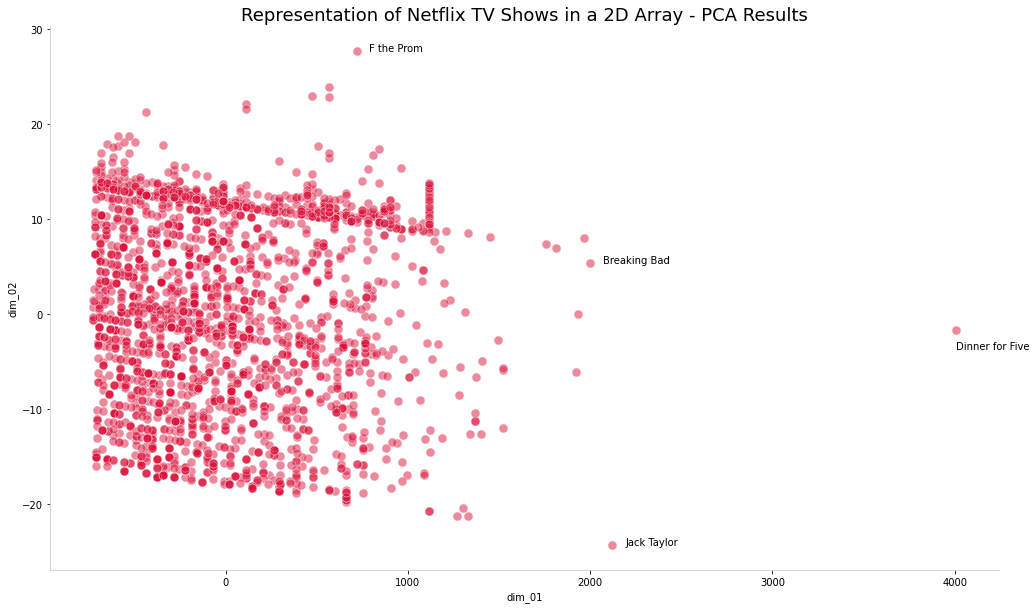

In [46]:
# Creating a PCA with 2 components
pca = PCA(n_components=2)
X_tvshows_2d = pca.fit_transform(X_tvshows)
X_tvshows_2d = pd.DataFrame(X_tvshows_2d, columns=['dim_01', 'dim_02'])

# Plotting the new 2D data
fig, ax = plt.subplots(figsize=(17, 10))
sns.scatterplot(x='dim_01', y='dim_02', data=X_tvshows_2d, alpha=.5, color='crimson', s=80)

# Customizing chart
format_spines(ax)
ax.set_title('Representation of Netflix TV Shows in a 2D Array - PCA Results', size=18)

# Sorting movies by dim 01
sorted_tvshows_dim01 = X_tvshows_2d.sort_values(by='dim_01', ascending=False)
sorted_tvshows_dim02 = X_tvshows_2d.sort_values(by='dim_02', ascending=False)

# Retrieving top 3 movies by dim 01
top01_dim01_tvshow = tvshows.iloc[sorted_tvshows_dim01.index[0], :].title
top02_dim01_tvshow = tvshows.iloc[sorted_tvshows_dim01.index[1], :].title
top03_dim01_tvshow = tvshows.iloc[sorted_tvshows_dim01.index[2], :].title

# Retrieving top 1 movies by dim 02
top01_dim02_tvshow = movies.iloc[sorted_tvshows_dim02.index[0], :].title

# Making annotations
ax.annotate(top01_dim01_tvshow, xy=(sorted_tvshows_dim01['dim_01'].values[0], 
                                   sorted_tvshows_dim01['dim_02'].values[0]-2), xycoords='data')
ax.annotate(top02_dim01_tvshow, xy=(sorted_tvshows_dim01['dim_01'].values[1]+70, 
                                   sorted_tvshows_dim01['dim_02'].values[1]), xycoords='data')
ax.annotate(top03_dim01_tvshow, xy=(sorted_tvshows_dim01['dim_01'].values[2]+70, 
                                   sorted_tvshows_dim01['dim_02'].values[2]), xycoords='data')
ax.annotate(top01_dim02_tvshow, xy=(sorted_tvshows_dim02['dim_01'].values[0]+70, 
                                   sorted_tvshows_dim02['dim_02'].values[0]), xycoords='data')

plt.show()

In [47]:
import plotly.express as px
df = df.rename(columns={"listed_in":"genre"})
df['genre'] = df['genre'].apply(lambda x: x.split(",")[0])

In [48]:
df_genre = pd.DataFrame(df.genre	.value_counts()).reset_index().rename(columns={'index':'genre', 'genre':'count'})
fig_tree = px.treemap(df_genre, path=[px.Constant("Distribution of Geners"), 'count','genre'])
fig_tree.update_layout(title='Highest watched Geners on Netflix',
                  margin=dict(t=50, b=0, l=70, r=40),
                  plot_bgcolor='#333', paper_bgcolor='#333',
                  title_font=dict(size=25, color='#fff', family="Lato, sans-serif"),
                  font=dict(color='#8a8d93'),
                  hoverlabel=dict(bgcolor="#444", font_size=13, font_family="Lato, sans-serif"))

##Clustering

In [49]:
# importing some more libraries
import matplotlib.cm as cm
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN

In [50]:
# a function to analysis silhoute

def silhouette_analysis(X, X_pca, range_n_clusters):
    for n_clusters in range_n_clusters:
        fig, (ax1, ax2) = plt.subplots(1, 2)
        fig.set_size_inches(18, 7)
        ax1.set_xlim([-0.1, 1])
        ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

        clusterer = KMeans(n_clusters=n_clusters, random_state=42)
        cluster_labels = clusterer.fit_predict(X)

        silhouette_avg = silhouette_score(X, cluster_labels)
        print("For n_clusters =", n_clusters,
              "The average silhouette_score is :", silhouette_avg)

        sample_silhouette_values = silhouette_samples(X, cluster_labels)

        y_lower = 10
        for i in range(n_clusters):
            ith_cluster_silhouette_values = \
                sample_silhouette_values[cluster_labels == i]

            ith_cluster_silhouette_values.sort()

            size_cluster_i = ith_cluster_silhouette_values.shape[0]
            y_upper = y_lower + size_cluster_i

            color = cm.nipy_spectral(float(i) / n_clusters)
            ax1.fill_betweenx(np.arange(y_lower, y_upper),
                              0, ith_cluster_silhouette_values,
                              facecolor=color, edgecolor=color, alpha=0.7)

            ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

            y_lower = y_upper + 10  

        ax1.set_title("The silhouette plot for the various clusters.")
        ax1.set_xlabel("The silhouette coefficient values")
        ax1.set_ylabel("Clusters")

        ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

        ax1.set_yticks([])  
        ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

        colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
        ax2.scatter(X_pca[0], X_pca[1], c=colors)
    
        ax2.set_title("The visualization of the clustered data.")
        ax2.set_xlabel("PCA component 1")
        ax2.set_ylabel("PCA component 2")

        plt.suptitle(("\nSilhouette analysis for KMeans clustering "
                      "with n_clusters = %d" % n_clusters),
                     fontsize=14, fontweight='bold')

    plt.show()

In [51]:
def silhouette_analysis2(X, X_pca, range_n_clusters):
    
    for n_clusters in range_n_clusters:
        fig, (ax1, ax2) = plt.subplots(1, 2)
        fig.set_size_inches(18, 7)

        ax1.set_xlim([-0.1, 1])
        ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

        clusterer = AgglomerativeClustering(n_clusters = n_clusters,
                                   affinity = 'euclidean',
                                   linkage = 'ward')
        cluster_labels = clusterer.fit_predict(X)

        silhouette_avg = silhouette_score(X, cluster_labels)
        print("For n_clusters =", n_clusters,
              "The average silhouette_score is :", silhouette_avg)

        sample_silhouette_values = silhouette_samples(X, cluster_labels)

        y_lower = 10
        for i in range(n_clusters):
            ith_cluster_silhouette_values = \
                sample_silhouette_values[cluster_labels == i]

            ith_cluster_silhouette_values.sort()

            size_cluster_i = ith_cluster_silhouette_values.shape[0]
            y_upper = y_lower + size_cluster_i

            color = cm.nipy_spectral(float(i) / n_clusters)
            ax1.fill_betweenx(np.arange(y_lower, y_upper),
                              0, ith_cluster_silhouette_values,
                              facecolor=color, edgecolor=color, alpha=0.7)

            ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

            y_lower = y_upper + 10  

        ax1.set_title("The silhouette plot for the various clusters.")
        ax1.set_xlabel("The silhouette coefficient values")
        ax1.set_ylabel("Clusters")

        ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

        ax1.set_yticks([])  
        ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

        colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
        ax2.scatter(X_pca[0], X_pca[1], c=colors)
    
        ax2.set_title("The visualization of the clustered data.")
        ax2.set_xlabel("PCA component 1")
        ax2.set_ylabel("PCA component 2")

        plt.suptitle(("\nSilhouette analysis for Agglomerative clustering "
                      "with n_clusters = %d" % n_clusters),
                     fontsize=14, fontweight='bold')

    plt.show()


For n_clusters = 2 The average silhouette_score is : 0.2282091754497737
For n_clusters = 3 The average silhouette_score is : 0.24789341691787448
For n_clusters = 4 The average silhouette_score is : 0.26136144608279044
For n_clusters = 5 The average silhouette_score is : 0.23668282747429453
For n_clusters = 6 The average silhouette_score is : 0.23917329568827492
For n_clusters = 7 The average silhouette_score is : 0.2322343130779891


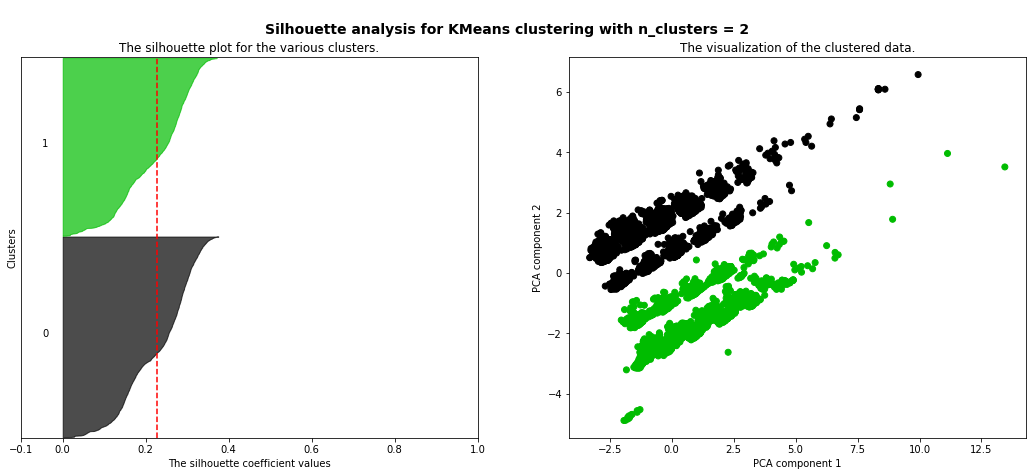

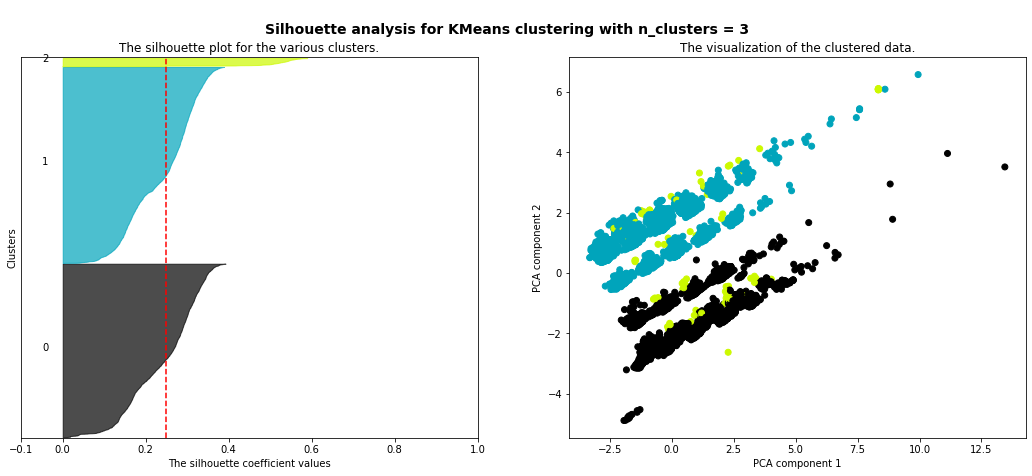

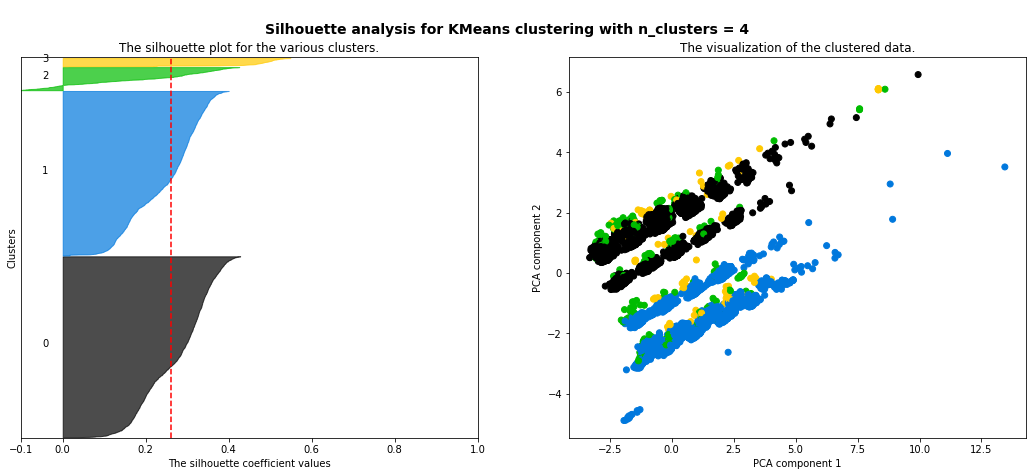

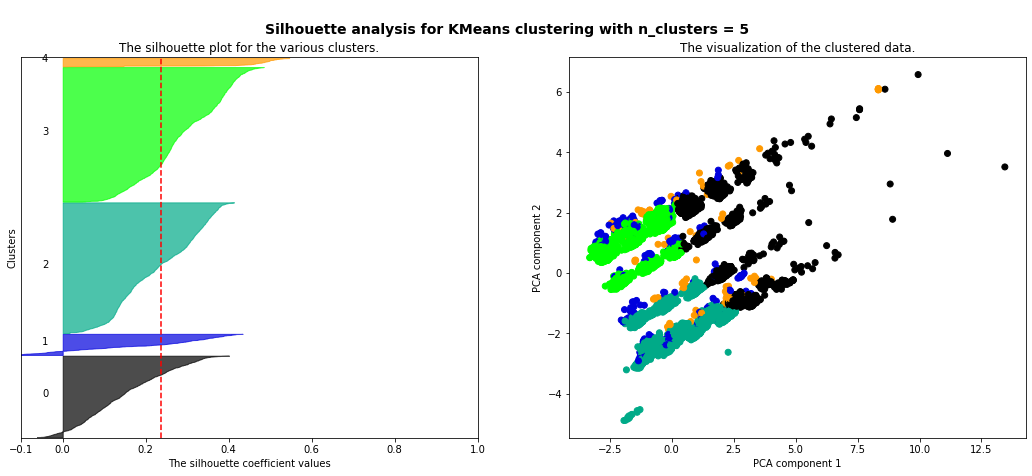

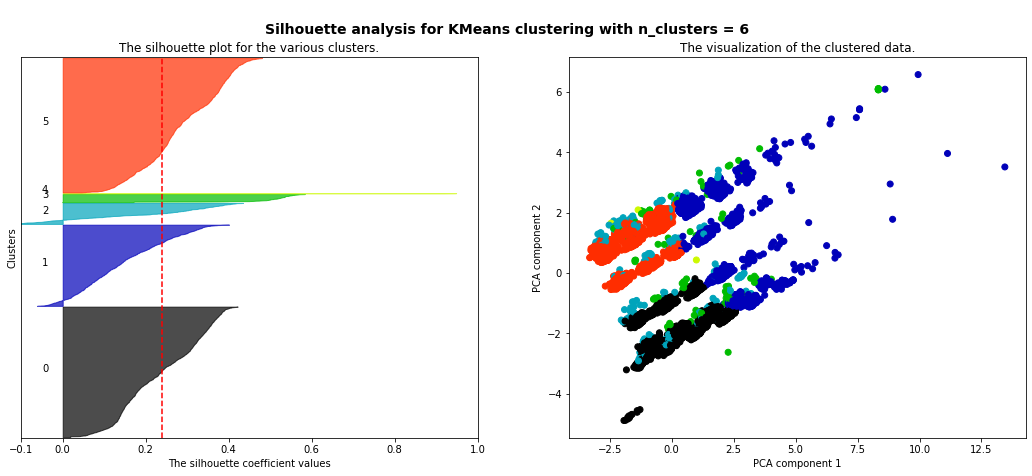

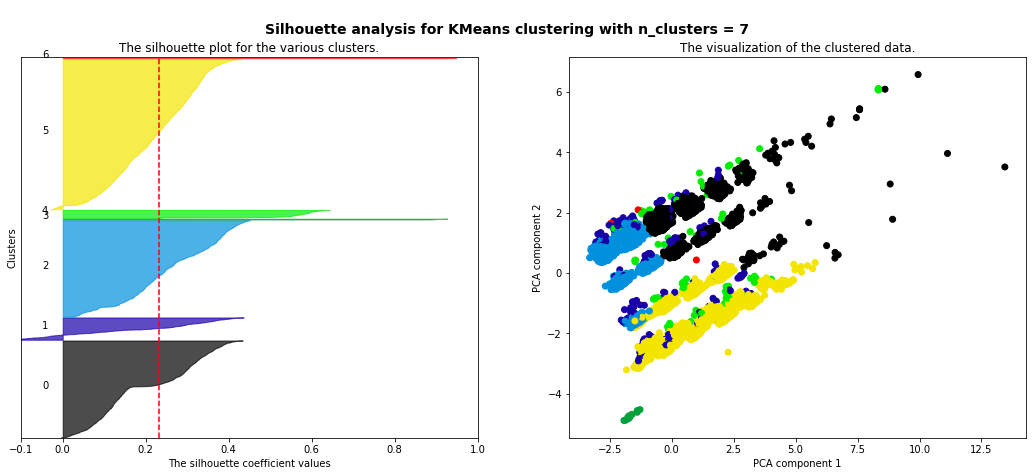

In [52]:
# transform the data
netflix_standarized = pd.DataFrame(StandardScaler().fit_transform(X_movies), 
                               columns = X_movies.columns)


#Perform a PCA to visualize clusters
pca=PCA(n_components=2)
netflix_pca=pd.DataFrame(pca.fit_transform(netflix_standarized))
###   PARTITIONAL CLUSTERING

silhouette_analysis(np.array(netflix_standarized), 
                    netflix_pca, 
                    [2, 3, 4, 5, 6, 7])

**From the above analysis, we can make cluster either 3 or 4.**

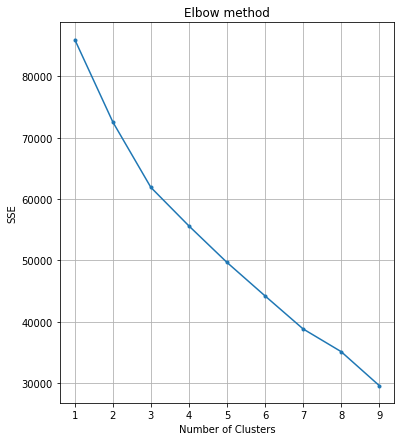

In [53]:
# To help choose the number of clusters, elbow method:

sse = []
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(netflix_standarized)
    sse.append(kmeans.inertia_)

plt.plot(range(1, 10), sse,'.-')
plt.grid(b=True)
#plt.xticks(range(1, 11))
plt.title("Elbow method")
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

**Again either 3 or 4 clusters.**

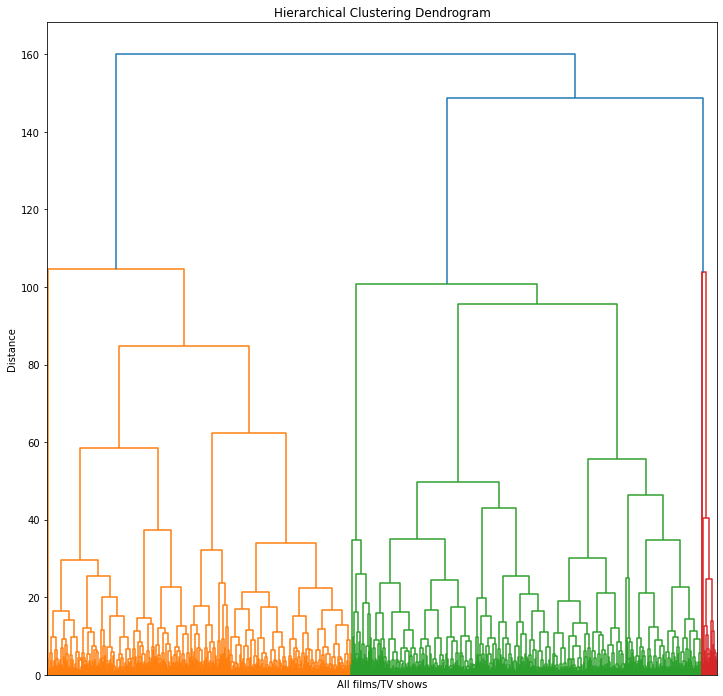

In [54]:
# HIERARCHICAL CLUSTERING
distances_linkage = linkage(netflix_standarized,
                            method = 'ward', 
                            metric = 'euclidean')
                      
plt.figure(figsize=(12, 12))

plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('All films/TV shows')
plt.ylabel('Distance')

dendrogram(
    distances_linkage,
    no_labels = True
)

plt.show()

**So, from all the observation we go with 3 clusters as every method giving best result for 3 clusters.**

##Recommand sysytem

In [55]:
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

In [56]:
#Replace NaN with an empty string, since the converter cannot deal with integer/float
df['description'] = df['description'].fillna('')

In [57]:
#removing stopwords
tfidf = TfidfVectorizer(stop_words='english')

#get the tf-idf scores
#create TF-IDF matrix by fitting and transforming the data
tfidf_matrix = tfidf.fit_transform(df['description'])

#shape of tfidf_matrix
tfidf_matrix.shape

(7770, 17888)

In [58]:
pd.DataFrame(tfidf_matrix[0].T.todense(), index=tfidf.get_feature_names(), columns=["tf-idf score"])

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.



,tf-idf score
000,0.0
007,0.0
009,0.0
10,0.0
100,0.0
...,...
ömer,0.0
über,0.0
łukasz,0.0
ōarai,0.0


In [59]:
#CountVectorizer: Convert a collection of text documents to a matrix of token counts
#TfidfTransformer: Transform a count matrix to a normalized tf or tf-idf representation

from sklearn.pipeline import Pipeline

pipe = Pipeline([('cv', CountVectorizer(stop_words='english')),
                ('tfid', TfidfTransformer())]).fit(df['description'])

print("CountVectorizer_matrix: {}".format(pipe['cv'].transform(df['description']).toarray()))
print("CountVectorizer_matrix: {}".format(pipe['tfid'].idf_))

CountVectorizer_matrix: [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
CountVectorizer_matrix: [6.40280607 8.34871622 9.26500695 ... 9.26500695 9.26500695 9.26500695]


In [60]:
#The lower the IDF value of a word, the less unique it is to any particular document
pd.DataFrame(pipe['tfid'].idf_, index=pipe['cv'].get_feature_names(), columns=['idf_weights'])

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.



,idf_weights
000,6.402806
007,8.348716
009,9.265007
10,6.244582
100,7.250104
...,...
ömer,9.265007
über,8.859542
łukasz,9.265007
ōarai,9.265007


Limitation of TF-IDF As the ordering of the sentence is discarded.

compute similarity directly in the word-count space, which may be slow for large vocabularies assume the counts of different words are independent synonyms between words are ignored, eg trip and journey

##Calculate cosine similarity by sklearn.pairwise.package

Cosine similarity Three way to calculate similiarity

Euclidean distance Pearson correlation Cosine similiarity Here cosine similarity is used. It measures the cosine of the angle between two vectors projected in a multi-dimensional space to find out how similar the documents are irrespective of their size. The smaller the angle, higher the cosine similarity.

It is advantageous because even if the two similar documents are far apart by the Euclidean distance (due to the size of the document).

from

In [61]:
from sklearn.metrics.pairwise import cosine_similarity
cosine_sim = cosine_similarity(tfidf_matrix)

In [62]:
programme_list=df['title'].to_list()

In [63]:
def recommend(title, cosine_similarity=cosine_sim):
    index = programme_list.index(title)
    sim_score = list(enumerate(cosine_sim[index]))
    sim_score = sorted(sim_score, key= lambda x: x[1], reverse=True)[1:11] #position 0 is the movie itself, thus exclude
    recommend_index = [i[0] for i in sim_score]
    rec_movie = df['title'].iloc[recommend_index]
    rec_score = [round(i[1],4) for i in sim_score]
    rec_table = pd.DataFrame(list(zip(rec_movie,rec_score)), columns=['Recommend programme','Similarity(0-1)'])
    return rec_table

In [64]:
recommend('Avengers: Infinity War')

,Recommend programme,Similarity(0-1)
0,The Talented Mr. Ripley,0.1598
1,The Darkness,0.1371
2,Aliens Ate My Homework,0.1247
3,LEGO Marvel Super Heroes: Black Panther,0.1243
4,Chilling Adventures of Sabrina,0.1194
5,Vroomiz,0.1126
6,Orbiter 9,0.1094
7,Code Lyoko,0.1081
8,Vampires,0.1057
9,LEGO Marvel Super Heroes: Guardians of the Galaxy,0.1047


In [65]:
recommend("Indiana Jones and the Last Crusade")

,Recommend programme,Similarity(0-1)
0,Fate/Apocrypha,0.2318
1,Fate/EXTRA Last Encore,0.1948
2,Fate/Zero,0.1905
3,Indiana Jones and the Temple of Doom,0.1896
4,Fate/stay night: Unlimited Blade Works,0.1860
5,Indiana Jones and the Raiders of the Lost Ark,0.1820
6,Monty Python and the Holy Grail,0.1727
7,Indiana Jones and the Kingdom of the Crystal S...,0.1642
8,Pajanimals,0.1561
9,Dragons: Dawn of the Dragon Racers,0.1194


**NOTE**: As above recommendation engine is constructed based on description only, it probably wouldn't suggest the movies in series, but movies with more similar key words.

In [66]:
#select programme type,country,genres,director & description
#join all the info together
#convert all words into lowercase so that algorithm will not distinguish as independent words
def bag_of_words(dt):
    features = dt['type']+' '+dt['country']+' '+dt['genre']+' '+dt['director']+' '+dt['description']
    return features.fillna('').str.lower()

features = bag_of_words(df)

In [67]:
tfidf_matrix2 = tfidf.fit_transform(features)                
tfidf_matrix2.shape

(7770, 22476)

In [68]:
cosine_sim2 = cosine_similarity(tfidf_matrix2)

In [69]:
def recommend2(title, cosine_similarity=cosine_sim2):
    index = programme_list.index(title)
    sim_score = list(enumerate(cosine_sim2[index]))
    sim_score = sorted(sim_score, key= lambda x: x[1], reverse=True)[1:11] #position 0 is the movie itself, thus exclude
    recommend_index = [i[0] for i in sim_score]
    rec_movie = df['title'].iloc[recommend_index]
    rec_score = [round(i[1],4) for i in sim_score]
    rec_table = pd.DataFrame(list(zip(rec_movie,rec_score)), columns=['Recommend programme','Similarity(0-1)'])
    return rec_table

In [70]:
recommend2("Indiana Jones and the Last Crusade")

,Recommend programme,Similarity(0-1)
0,Indiana Jones and the Temple of Doom,0.3442
1,Indiana Jones and the Raiders of the Lost Ark,0.3254
2,Indiana Jones and the Kingdom of the Crystal S...,0.2982
3,Lincoln,0.2268
4,Monty Python and the Holy Grail,0.2160
5,Fate/Apocrypha,0.2065
6,Fate/EXTRA Last Encore,0.1704
7,Fate/Zero,0.1670
8,Fate/stay night: Unlimited Blade Works,0.1633
9,The Do-Over,0.1505


##Inferences and Conclusion

It's clear that Netflix has grown over the years. We can see it from the data that the company took certain approaches in their marketing strategy to break into new markets around the world. Based on an article from Business Insider, Netflix had about 158 million subscribers worldwide with 60 million from the US and almost 98 million internationally. Netflix's original subscriber base was based solely in the United States following its IPO. A large part of its success was due to the decision to expand to international markets. The popular markets prioritizes what content the company will release. In this case, we can see that a good amount of international movies and TV shows were added over the years as part of Netflix's global expansion.